<a href="https://colab.research.google.com/github/CristianVeloz0501/DMC/blob/main/Analisis_consumo_EP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [3]:
Data = pd.read_excel('demanda electrica.xlsx')

In [4]:
Data

,Año,Mes,AMAZONAS,ANCASH,APURIMAC,AREQUIPA,AYACUCHO,CAJAMARCA,CUSCO,HUANCAVELICA,...,MADRE DE DIOS,MOQUEGUA,PASCO,PIURA,PUNO,SAN MARTIN,TACNA,TUMBES,UCAYALI,Total general
0,2005.0,1.0,1643.363,7862.609,1391.614,18145.368,2175.393,3520.738,8062.514,772.543,...,771.927,2403.291,1584.943,12608.438,4187.596,4758.310,4914.801,2307.621,3423.187,411966.997
1,2005.0,2.0,1484.133,7104.901,1368.266,17465.001,2010.494,3246.376,8154.654,679.096,...,698.870,2148.603,1433.324,11326.193,4096.179,4283.604,4334.073,2085.904,2623.442,387468.101
2,2005.0,3.0,1649.053,8006.607,1382.709,17286.417,2226.559,3714.058,8353.612,804.287,...,704.787,2391.663,1602.058,12381.301,4055.902,4815.545,4835.106,2354.288,2988.460,397143.666
3,2005.0,4.0,1687.575,7902.861,1513.445,18247.551,2246.702,3709.229,8496.546,835.737,...,797.506,2263.968,1695.819,11920.556,4649.540,4831.494,4609.402,2345.639,3003.625,415729.659
4,2005.0,5.0,1769.414,7878.068,1501.068,18336.537,2356.035,3848.185,8321.864,880.877,...,750.881,2331.801,1736.790,11532.950,4786.931,4898.573,4745.815,2282.230,3201.952,406025.969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2018.0,8.0,2437.012,13744.262,3376.564,41069.088,7403.476,12971.012,19178.800,1758.298,...,3205.567,4346.679,1872.970,28866.730,12765.750,11557.437,8609.400,3811.041,9120.738,798822.693
164,2018.0,9.0,2422.244,13607.131,3415.033,40120.072,7496.472,12585.500,19108.787,1688.026,...,3555.435,4267.662,1857.647,28372.105,12613.644,11711.656,8435.874,3680.276,9693.396,785677.124
165,2018.0,10.0,2489.652,13997.490,3215.018,41766.901,7504.505,13240.140,18694.314,1742.876,...,3667.885,4503.814,1929.922,29001.239,12309.274,11827.464,8928.149,3858.829,10018.643,798497.786
166,2018.0,11.0,2555.844,13793.863,3416.735,40952.926,7490.805,12799.875,18950.443,1685.312,...,3677.026,4466.045,1904.037,29959.330,12582.773,11745.786,8803.559,3856.147,9541.279,798224.155


In [ ]:
Data.info()

In [13]:
Data['Año']=Data['Año'].astype(int)
Data['Mes']=Data['Mes'].astype(int)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            168 non-null    int64  
 1   Mes            168 non-null    int64  
 2   AMAZONAS       168 non-null    float64
 3   ANCASH         168 non-null    float64
 4   APURIMAC       168 non-null    float64
 5   AREQUIPA       168 non-null    float64
 6   AYACUCHO       168 non-null    float64
 7   CAJAMARCA      168 non-null    float64
 8   CUSCO          168 non-null    float64
 9   HUANCAVELICA   168 non-null    float64
 10  HUANUCO        168 non-null    float64
 11  ICA            168 non-null    float64
 12  JUNIN          168 non-null    float64
 13  LA LIBERTAD    168 non-null    float64
 14  LAMBAYEQUE     168 non-null    float64
 15  LIMA           168 non-null    float64
 16  LORETO         168 non-null    float64
 17  MADRE DE DIOS  168 non-null    float64
 18  MOQUEGUA  

In [14]:
Data.sort_index()
Data_group=Data.groupby(['Año','Mes']).mean()
Data_group

AMAZONAS     ANCASH  APURIMAC   AREQUIPA  AYACUCHO  CAJAMARCA  \
Año  Mes                                                                  
2005 1    1643.363   7862.609  1391.614  18145.368  2175.393   3520.738   
     2    1484.133   7104.901  1368.266  17465.001  2010.494   3246.376   
     3    1649.053   8006.607  1382.709  17286.417  2226.559   3714.058   
     4    1687.575   7902.861  1513.445  18247.551  2246.702   3709.229   
     5    1769.414   7878.068  1501.068  18336.537  2356.035   3848.185   
...            ...        ...       ...        ...       ...        ...   
2018 8    2437.012  13744.262  3376.564  41069.088  7403.476  12971.012   
     9    2422.244  13607.131  3415.033  40120.072  7496.472  12585.500   
     10   2489.652  13997.490  3215.018  41766.901  7504.505  13240.140   
     11   2555.844  13793.863  3416.735  40952.926  7490.805  12799.875   
     12   2548.866  14716.900  3368.439  42907.441  7638.000  13131.143   

              CUSCO  HUANCAVELICA   HUANUCO        ICA  ...  MADRE DE DIOS  \
Año  Mes                                                ...                  
2005 1     8062.514       772.543  3037.925   9394.547  ...        771.927   
     2     8154.654       679.096  2717.631   8354.641  ...        698.870   
     3     8353.612       804.287  3081.422   9286.458  ...        704.787   
     4     8496.546       835.737  3134.537   8613.316  ...        797.506   
     5     8321.864       880.877  3253.508   8600.029  ...        750.881   
...             ...           ...       ...        ...  ...            ...   
2018 8    19178.800      1758.298  7404.752  18486.566  ...       3205.567   
     9    19108.787      1688.026  7316.074  18730.193  ...       3555.435   
     10   18694.314      1742.876  7582.154  19234.834  ...       3667.885   
     11   18950.443      1685.312  7423.964  19381.740  ...       3677.026   
     12   18243.016      1678.802  7621.426  21025.900  ...       3423.445   

          MOQUEGUA     PASCO      PIURA       PUNO  SAN MARTIN     TACNA  \
Año  Mes                                                                   
2005 1    2403.291  1584.943  12608.438   4187.596    4758.310  4914.801   
     2    2148.603  1433.324  11326.193   4096.179    4283.604  4334.073   
     3    2391.663  1602.058  12381.301   4055.902    4815.545  4835.106   
     4    2263.968  1695.819  11920.556   4649.540    4831.494  4609.402   
     5    2331.801  1736.790  11532.950   4786.931    4898.573  4745.815   
...            ...       ...        ...        ...         ...       ...   
2018 8    4346.679  1872.970  28866.730  12765.750   11557.437  8609.400   
     9    4267.662  1857.647  28372.105  12613.644   11711.656  8435.874   
     10   4503.814  1929.922  29001.239  12309.274   11827.464  8928.149   
     11   4466.045  1904.037  29959.330  12582.773   11745.786  8803.559   
     12   4799.745  1918.598  31921.824  12126.079   11820.557  9460.529   

            TUMBES    UCAYALI  Total general  
Año  Mes                                      
2005 1    2307.621   3423.187     411966.997  
     2    2085.904   2623.442     387468.101  
     3    2354.288   2988.460     397143.666  
     4    2345.639   3003.625     415729.659  
     5    2282.230   3201.952     406025.969  
...            ...        ...            ...  
2018 8    3811.041   9120.738     798822.693  
     9    3680.276   9693.396     785677.124  
     10   3858.829  10018.643     798497.786  
     11   3856.147   9541.279     798224.155  
     12   4320.541   9682.638     806828.348  

[168 rows x 25 columns]

In [5]:
Data.isnull().sum() # no existen nulos


Año              0
Mes              0
AMAZONAS         0
ANCASH           0
APURIMAC         0
AREQUIPA         0
AYACUCHO         0
CAJAMARCA        0
CUSCO            0
HUANCAVELICA     0
HUANUCO          0
ICA              0
JUNIN            0
LA LIBERTAD      0
LAMBAYEQUE       0
LIMA             0
LORETO           0
MADRE DE DIOS    0
MOQUEGUA         0
PASCO            0
PIURA            0
PUNO             0
SAN MARTIN       0
TACNA            0
TUMBES           0
UCAYALI          0
Total general    0
dtype: int64

In [6]:
departamentos=[]
for d in Data:
    if (d!="Año") and (d!="Mes") and (d!="Total general"):
        departamentos.append(d)

In [7]:
prom_depa=Data[departamentos].mean().reset_index().rename(columns={"index": "Departamentos", 0: "promedio"})
prom_depa.sort_values(by="promedio", ascending=False, inplace=True)
prom_depa.head()

,Departamentos,promedio
13,LIMA,399711.792315
3,AREQUIPA,31357.973345
11,LA LIBERTAD,26705.638321
18,PIURA,21073.524524
12,LAMBAYEQUE,18788.660399


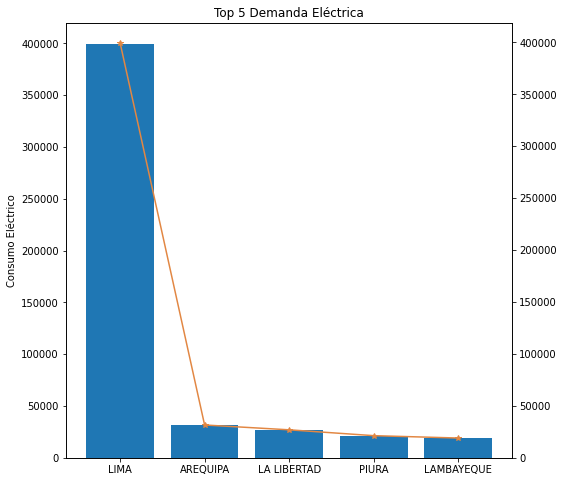

In [8]:
x=list(prom_depa["Departamentos"].head(5).values)
y=list(prom_depa["promedio"].head(5).values)
fig,ax=plt.subplots(figsize=(8,8))
ax.bar(x,y)
ax2=ax.twinx()
ax2.plot(x,y, linewidth=1.5, color="#e28743", marker="*")
ax.set_title("Top 5 Demanda Eléctrica")
ax.set_ylabel("Consumo Eléctrico")
plt.show()

El crecimiento de la demanda desde el 2005 hasta el 2018 ha sido de 93.71 %


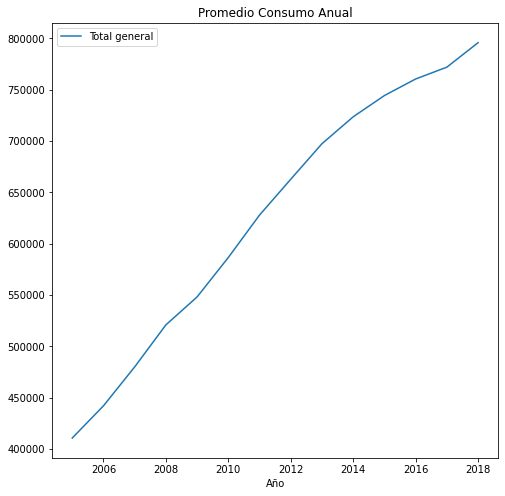

In [9]:
prom_anual=Data.groupby(["Año"]).agg({"Total general":"mean"}).reset_index()
prom_anual.plot(kind="line", x="Año", figsize=(8,8))
plt.title("Promedio Consumo Anual")
print("El crecimiento de la demanda desde el 2005 hasta el 2018 ha sido de",round((prom_anual.max()[1]-prom_anual.min()[1])/prom_anual.min()[1]*100,2),"%")

In [19]:
def graficar (data, variable):
  plt.figure(figsize=(16, 4), dpi=200)

  # histogram
  ax = plt.subplot(1, 4, 1)
  sbn.kdeplot(data[variable], color='Red', fill=True)
  ax.set_title("Grafico de Densidad", fontsize=15, fontweight='normal', fontfamily='serif')
  plt.ylabel('Densidad', fontfamily='serif')
  plt.xlabel('Consumo electrico', fontfamily='serif')
  plt.grid(True, linestyle = '--', linewidth = 0.5)

  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

  #Q - Q plot

  ax = plt.subplot(1,4,2)
  stats.probplot(data[variable], dist="norm", plot=plt)
  ax.get_lines()[0].set_markerfacecolor('r')
  ax.set_title("Grafica de probabilidad", fontsize=15, fontweight='normal', fontfamily='serif')
  plt.ylabel('Consumo electrico', fontfamily='serif')
  plt.xlabel('Quantiles', fontfamily='serif')
  plt.grid(True, linestyle = '--', linewidth = 0.5)

  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

  # Box
  ax=plt.subplot(1,4,3)
  sbn.boxplot(data=data[variable], color='Lightblue',orient='v')
  ax.set_title("Boxplot", fontsize=15, fontweight='normal', fontfamily='serif')
  plt.xlabel('Consumo electrico', fontfamily='serif')
  plt.grid(True, linestyle = '--', linewidth = 0.5)

  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)


  # Scatterplot
  ax=plt.subplot(1,4,4)
  sbn.scatterplot(data=data[variable], color='Lightgreen')
  ax.set_title("Grafica de Dispersion", fontsize=15, fontweight='normal', fontfamily='serif')
  plt.xlabel('Consumo electrico', fontfamily='serif')
  plt.grid(True, linestyle = '--', linewidth = 0.5)

  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

In [15]:
Data_g1=Data_group.loc[(2005,1):2018,'LIMA']

In [16]:
Dt=Data_g1.reset_index()

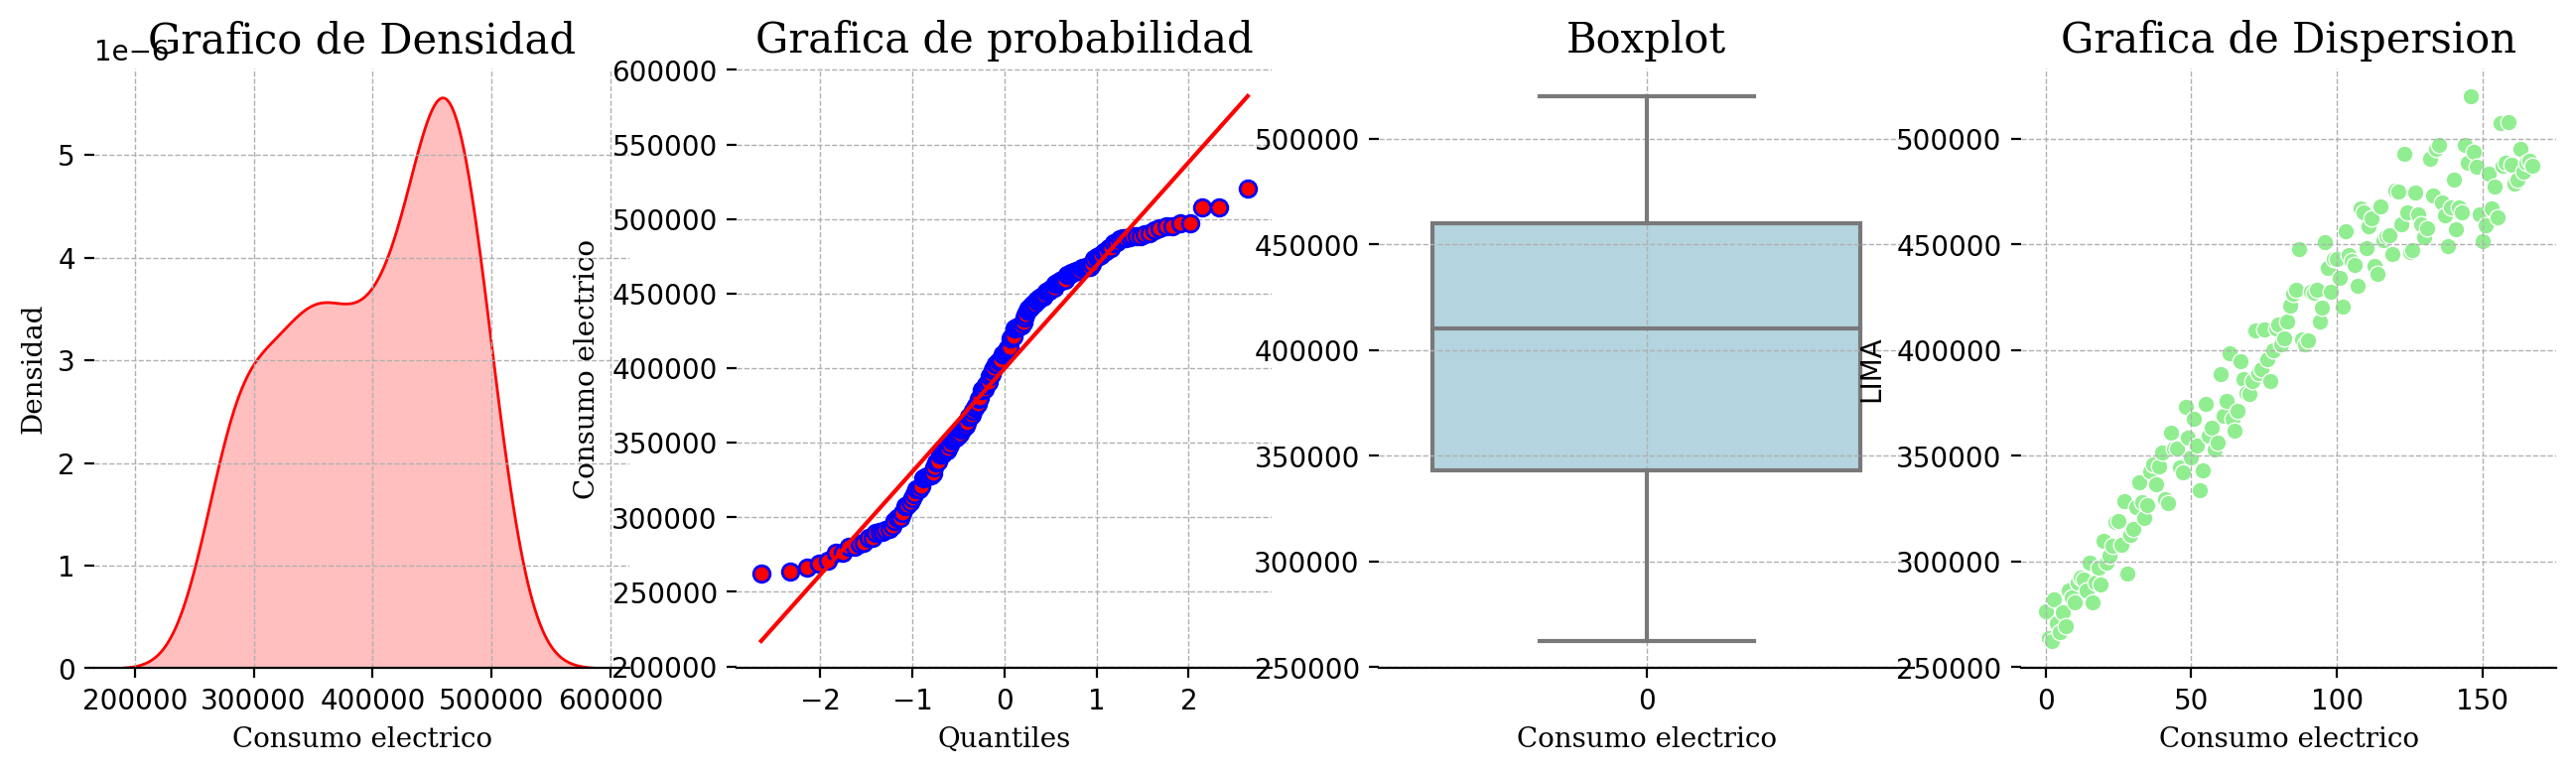

In [20]:
graficar(Dt,'LIMA')